# This correlation analysis will be conducted with the Iris data set.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Stats
from scipy import stats
from scipy.stats import pearsonr, linregress
from statsmodels.formula.api import ols

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# allows plotting viewed in the notebook
%matplotlib inline

In [2]:
# Loading the data
data = sns.load_dataset('iris')

#Taking a peak at the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Let's take a look at the correlation matrix to see if there are any correlations between any of the variables

data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


#### Data shows correlations between the sepal_length and pedal_length, between the sepal_length and the petal_width, and between the petal_length and the petal_width. It'd be interesting to see if this correlation stands true when it's broken down by species type.

In [4]:
# This shows the correlations between the variables brokendown by the individual species type.

data.groupby('species').corr()

petal_length  petal_width  sepal_length  sepal_width
species                                                                      
setosa     petal_length      1.000000     0.331630      0.267176     0.177700
           petal_width       0.331630     1.000000      0.278098     0.232752
           sepal_length      0.267176     0.278098      1.000000     0.742547
           sepal_width       0.177700     0.232752      0.742547     1.000000
versicolor petal_length      1.000000     0.786668      0.754049     0.560522
           petal_width       0.786668     1.000000      0.546461     0.663999
           sepal_length      0.754049     0.546461      1.000000     0.525911
           sepal_width       0.560522     0.663999      0.525911     1.000000
virginica  petal_length      1.000000     0.322108      0.864225     0.401045
           petal_width       0.322108     1.000000      0.281108     0.537728
           sepal_length      0.864225     0.281108      1.000000     0.457228
           sepal_width       0.401045     0.537728      0.457228     1.000000

#### Here we can see the different correlations within each species type. It's worthy to note that this does not tell us if the correlations are signifacant or not. Let's test the significance of these next.




# First, let's visualize what we just went over

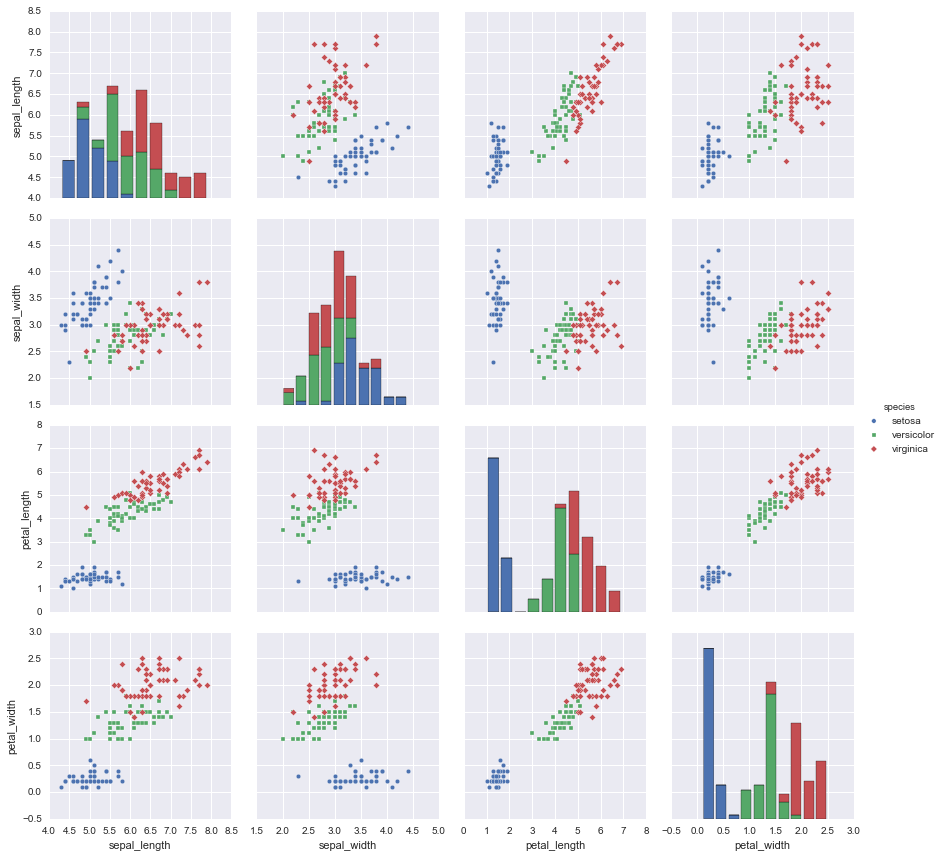

In [5]:
# We could plot each of these individually, however let's go big this time!

sns.pairplot(data, hue= 'species', markers=["o","s","D"], size=3)

In [6]:
# Breaking down the matrix into smaller matrices to test for significance of the correlation values
# So that it can be presented in a DataFrame for easier viewing
setosa_df = data.ix[data.species == 'setosa']
vers_df = data.ix[data.species == 'versicolor']
vir_df = data.ix[data.species == 'virginica']

In [7]:
# Removing the name column for function purposes
setosa_df=setosa_df.drop('species', axis=1)
vers_df=vers_df.drop('species', axis=1)
vir_df=vir_df.drop('species', axis=1)

In [8]:
# Let's see the correlation and signifance of the setosa species

df = setosa_df
rho = df.corr()
pval = np.zeros([df.shape[1],df.shape[1]])

for i in range(df.shape[1]): # rows are the number of rows in the matrix.
    for j in range(df.shape[1]):
        JonI        = pd.ols(y=df.iloc[:,i], x=df.iloc[:,j], intercept=True)
        pval[i,j]  = JonI.f_stat['p-value']

print "Correlation matrix for the Setosa species"
rho


Correlation matrix for the Setosa species


C:\Users\CoreySSD\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [9]:
print "Significance values of the correlation matrix for the Setosa species"
DataFrame(pval, index= rho.index, columns= rho.columns)

Significance values of the correlation matrix for the Setosa species


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.000000e+00,6.709843e-10,0.060698,0.050526
sepal_width,6.709843e-10,0.000000e+00,0.216979,0.103821
petal_length,6.069778e-02,2.169789e-01,0.000000,0.018639
petal_width,5.052644e-02,1.038211e-01,0.018639,0.000000


#### You can see the correlation matrix has some significant findings between the correlation of several values.

In [10]:
df= vers_df
rho = df.corr()
pval = np.zeros([df.shape[1],df.shape[1]])

for i in range(df.shape[1]): # rows are the number of rows in the matrix.
    for j in range(df.shape[1]):
        JonI        = pd.ols(y=df.iloc[:,i], x=df.iloc[:,j], intercept=True)
        pval[i,j]  = JonI.f_stat['p-value']

print "Correlation matrix for the Versicolor species"
rho

Correlation matrix for the Versicolor species


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [11]:
print "Signifance values of the correlation matrix for the Versicolor species"
DataFrame(pval, index= rho.index, columns= rho.columns)

Signifance values of the correlation matrix for the Versicolor species


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.000000e+00,8.771860e-05,2.586189e-10,4.035422e-05
sepal_width,8.771860e-05,0.000000e+00,2.302168e-05,1.466661e-07
petal_length,2.586189e-10,2.302168e-05,0.000000e+00,1.271916e-11
petal_width,4.035422e-05,1.466661e-07,1.271916e-11,0.000000e+00


#### Unlike like the Setosa species, all the variables that were measured were signficantly correlated.

In [12]:
df= vir_df
rho = df.corr()
pval = np.zeros([df.shape[1],df.shape[1]])

for i in range(df.shape[1]): # rows are the number of rows in the matrix.
    for j in range(df.shape[1]):
        JonI        = pd.ols(y=df.iloc[:,i], x=df.iloc[:,j], intercept=True)
        pval[i,j]  = JonI.f_stat['p-value']

print "Correlation matrix for the Virginica species"
rho

Correlation matrix for the Virginica species


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [13]:
print "Signifance values of the correlation matrix for the Verginica species"
DataFrame(pval, index= rho.index, columns= rho.columns)

Signifance values of the correlation matrix for the Verginica species


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.000000e+00,0.000843,6.661338e-16,0.047981
sepal_width,8.434625e-04,0.000000,3.897704e-03,0.000056
petal_length,6.661338e-16,0.003898,0.000000e+00,0.022536
petal_width,4.798149e-02,0.000056,2.253577e-02,0.000000


#### Just like Versicolor species, all the variables that were measured were signficantly correlated.